# Import Libraries

In [44]:
import pandas as pd #for using dataframes
import numpy as np #for general stats

#for plots
import matplotlib.pyplot as plt 
import seaborn as sns

#randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Read Data

In [45]:
df = pd.read_excel(r"C:\Users\nmkha\Desktop\pratik\D2C\IIMR_Competition.xlsx", sheet_name="Sheet1")
display(df.head())

,Index,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status,compensation
0,1001,M,67.00,Others,91.00,Others,Commerce,58.00,Science & Technology,No,55.00,Marketing & Human Resources,58.80,Placed,270000.00
1,1002,M,79.33,Central,78.33,Others,Science,77.48,Science & Technology,Yes,86.50,Marketing & Finance,66.28,Placed,200000.00
2,1003,M,65.00,Central,68.00,Central,Arts,64.00,Commerce & Management,No,75.00,Marketing & Finance,57.80,Placed,250000.00
3,1004,M,56.00,Central,52.00,Central,Science,52.00,Science & Technology,No,66.00,Marketing & Human Resources,59.43,Not Placed,nan
4,1005,M,85.80,Central,73.60,Central,Commerce,73.30,Commerce & Management,No,96.80,Marketing & Finance,55.50,Placed,425000.00


# Descriptive stats and info

In [46]:
#to display non scientific notation values
pd.options.display.float_format = "{:.2f}".format

#descriptive stats for continuous variables
display(df.describe())


#other information
display(df.info())

,Index,ssc_%,hsc_%,degree_%,entrance_score,mba_%,compensation
count,219.00,219.00,219.00,219.00,219.00,219.00,151.00
mean,1107.34,67.39,66.41,66.46,72.17,62.34,288748.34
std,61.96,10.82,10.96,7.39,13.21,5.87,93853.52
min,1001.00,40.89,37.00,50.00,50.00,51.21,200000.00
25%,1054.00,60.60,60.90,61.00,60.00,58.11,240000.00
50%,1107.00,67.00,65.00,66.00,71.00,62.00,265000.00
75%,1160.50,76.00,73.00,72.00,83.50,66.37,300000.00
max,1215.00,89.40,97.70,91.00,98.00,77.89,940000.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            219 non-null    int64  
 1   Gender           219 non-null    object 
 2   ssc_%            219 non-null    float64
 3   ssc_board        219 non-null    object 
 4   hsc_%            219 non-null    float64
 5   hsc_board        219 non-null    object 
 6   hsc_stream       219 non-null    object 
 7   degree_%         219 non-null    float64
 8   degree_domain    219 non-null    object 
 9   work_experience  219 non-null    object 
 10  entrance_score   219 non-null    float64
 11  specialization   219 non-null    object 
 12  mba_%            219 non-null    float64
 13  status           219 non-null    object 
 14  compensation     151 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.8+ KB


None

# EDA

In [47]:
#Create Dataframe to analyse patterns

df_placed = df[df['status'].str.upper() == "PLACED"]
display(df_placed.head())

,Index,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status,compensation
0,1001,M,67.00,Others,91.00,Others,Commerce,58.00,Science & Technology,No,55.00,Marketing & Human Resources,58.80,Placed,270000.00
1,1002,M,79.33,Central,78.33,Others,Science,77.48,Science & Technology,Yes,86.50,Marketing & Finance,66.28,Placed,200000.00
2,1003,M,65.00,Central,68.00,Central,Arts,64.00,Commerce & Management,No,75.00,Marketing & Finance,57.80,Placed,250000.00
4,1005,M,85.80,Central,73.60,Central,Commerce,73.30,Commerce & Management,No,96.80,Marketing & Finance,55.50,Placed,425000.00
7,1008,M,82.00,Central,64.00,Central,Science,66.00,Science & Technology,Yes,67.00,Marketing & Finance,62.14,Placed,252000.00


## Plots

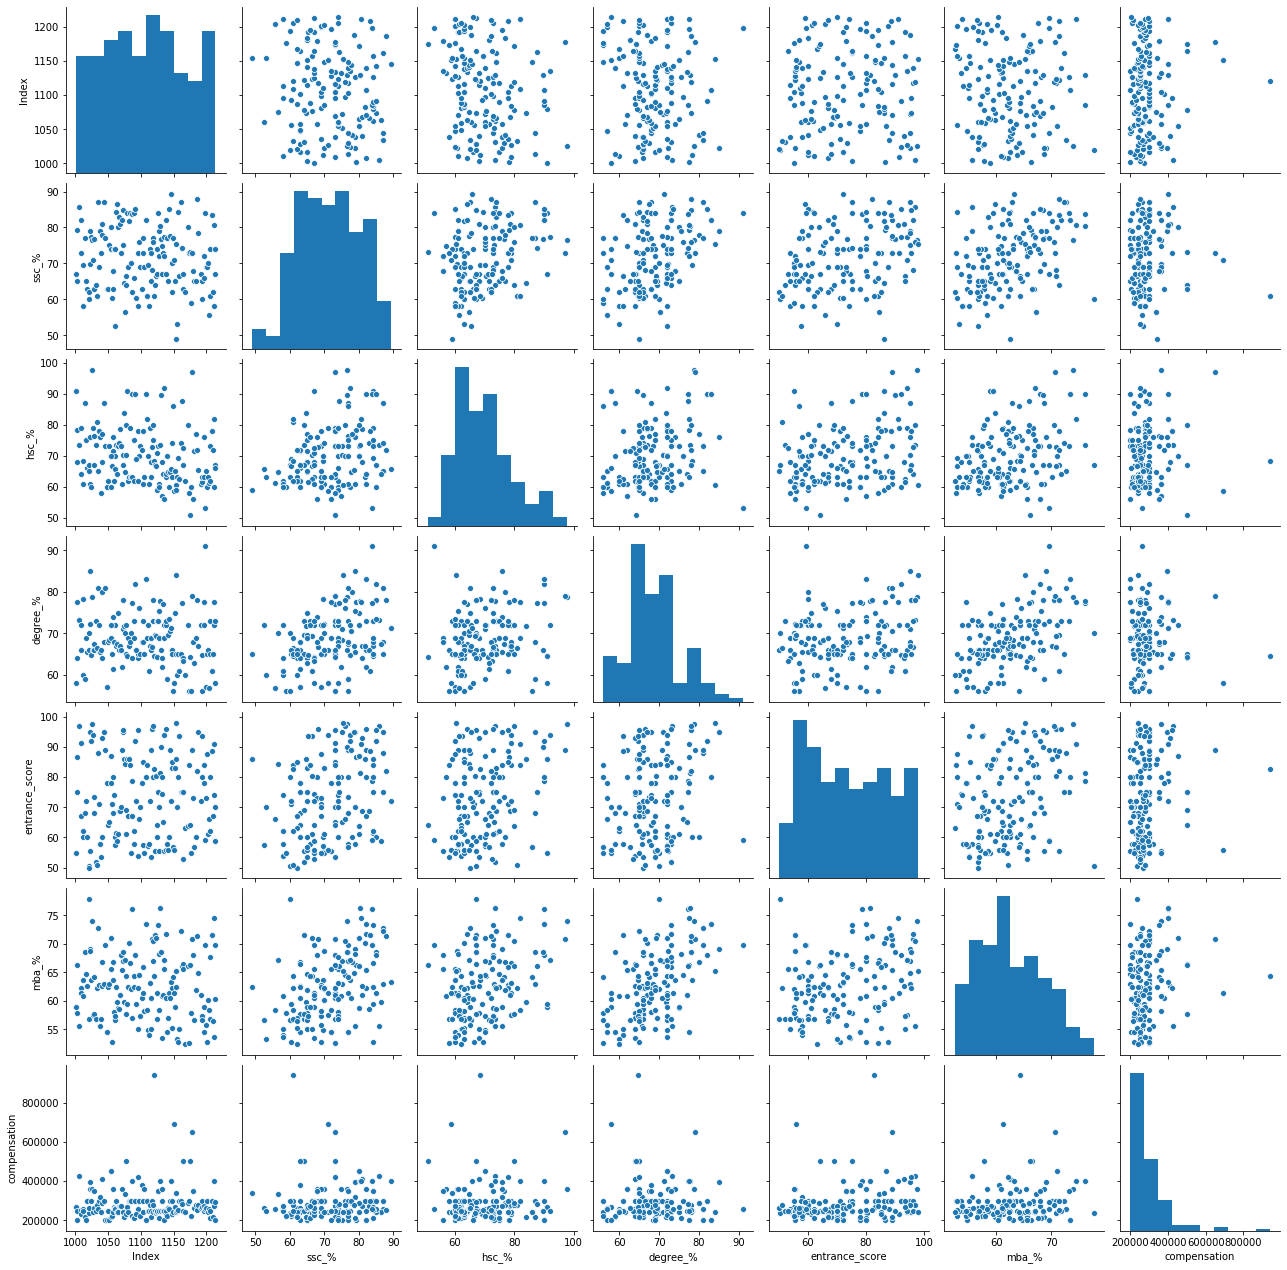

In [48]:
sns.pairplot(data = df_placed,
            kind = "scatter")

# Regression Analysis

## Preprocessing: label encode

In [49]:
#create list of categorical vars
catcolsm = list(df_placed.select_dtypes('object').columns)

#encoder
le = LabelEncoder()

#function to encode
def labelencode(data, col):
    nonulls=np.array(data.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = le.fit_transform(impute_reshape)
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    globals()[col+'_map'] = dict(zip(range(len(le.classes_)), le.classes_))
    return data

#labelencode
for col in catcolsm:
    labelencode(df_placed[col], col)
    
#review results
display(df_placed.head())

#display dictionaries created.
for col in catcolsm:
    display(globals()[col+'_map'])

C:\Users\nmkha\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nmkha\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nmkha\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Index,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status,compensation
0,1001,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,0,270000.00
1,1002,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,0,200000.00
2,1003,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,0,250000.00
4,1005,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,0,425000.00
7,1008,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,0,252000.00


{0: 'F', 1: 'M'}

{0: 'Central', 1: 'Others'}

{0: 'Central', 1: 'Others'}

{0: 'Arts', 1: 'Commerce', 2: 'Science'}

{0: 'Commerce & Management', 1: 'Medical & Others', 2: 'Science & Technology'}

{0: 'No', 1: 'Yes'}

{0: 'Marketing & Finance', 1: 'Marketing & Human Resources'}

{0: 'Placed'}

In [50]:
#Convert object dtype to category dtype
for col in catcolsm:
    df_placed[col] = df_placed[col].astype('category')

C:\Users\nmkha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
X = df_placed.drop(['compensation','Index', 'status'], axis = 1)
Y = df_placed[['compensation']]

display(X.head())
display(X.info())
display(Y.head())
display(Y.info())

,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%
0,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80
4,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 217
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           151 non-null    category
 1   ssc_%            151 non-null    float64 
 2   ssc_board        151 non-null    category
 3   hsc_%            151 non-null    float64 
 4   hsc_board        151 non-null    category
 5   hsc_stream       151 non-null    category
 6   degree_%         151 non-null    float64 
 7   degree_domain    151 non-null    category
 8   work_experience  151 non-null    category
 9   entrance_score   151 non-null    float64 
 10  specialization   151 non-null    category
 11  mba_%            151 non-null    float64 
dtypes: category(7), float64(5)
memory usage: 13.8 KB


None

,compensation
0,270000.00
1,200000.00
2,250000.00
4,425000.00
7,252000.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 217
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   compensation  151 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


None

# Iteration 1

In [52]:
# train test split
x_train, x_test, y_train1,  y_test1 = train_test_split(X, Y, test_size=0.2, random_state=0)
rf = RandomForestRegressor(n_estimators=200,random_state=1)

#Standardize
sc = StandardScaler()
x_train1= sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

#Fit model
rf.fit(x_train1, y_train1)

C:\Users\nmkha\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

### Feature Importances

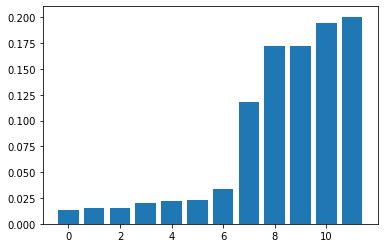

{'ssc_board': 0.01372001968761154,
 'specialization': 0.015367441837463578,
 'hsc_stream': 0.015541533527648053,
 'Gender': 0.01969055750999588,
 'work_experience': 0.02233835737067332,
 'hsc_board': 0.02285653286545209,
 'degree_domain': 0.03359878800681482,
 'mba_%': 0.11789557564420802,
 'degree_%': 0.17194377549216427,
 'ssc_%': 0.17200726609879052,
 'hsc_%': 0.19437098769147487,
 'entrance_score': 0.20066916426770293}

In [53]:
#Feature Importance
imp_dict = {}
for i,j in list(zip(x_test, rf.feature_importances_)):
    imp_dict[i] = j
imp_dict = {k:v for k,v in sorted(imp_dict.items(), key =lambda item: item[1])}

plt.bar([x for x in range(len(imp_dict.keys()))], [y for y in imp_dict.values()])
plt.show()

display(imp_dict)

### Evaluation

In [54]:
#R square
y_predict_train1 = rf.predict(x_train1)
y_predict_test1 = rf.predict(x_test1)

print("Training R^2 score: ", metrics.r2_score(y_train1 , y_predict_train1))
print("Testing R^2 score: ",metrics.r2_score(y_test1 , y_predict_test1))

#Accuracy
errors = abs(y_predict_train1 - np.array(y_train1['compensation']))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.array(y_train1['compensation']))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Training Accuracy:', round(accuracy, 2), '%.')


errors = abs(y_predict_test1 - np.array(y_test1['compensation']))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.array(y_test1['compensation']))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Testing Accuracy:', round(accuracy, 2), '%.')


Training R^2 score:  0.8382531561568779
Testing R^2 score:  0.02622387268434012
Training Accuracy: 93.14 %.
Testing Accuracy: 82.94 %.


# Iteration 2

In [55]:
#Selecting features with high importance (last 5 features in the graph)
X = df_placed[["entrance_score", "hsc_%", "ssc_%", "degree_%", "mba_%"]]
Y = df_placed[['compensation']]

display(X.head())
display(X.info())
display(Y.head())
display(Y.info())

,entrance_score,hsc_%,ssc_%,degree_%,mba_%
0,55.00,91.00,67.00,58.00,58.80
1,86.50,78.33,79.33,77.48,66.28
2,75.00,68.00,65.00,64.00,57.80
4,96.80,73.60,85.80,73.30,55.50
7,67.00,64.00,82.00,66.00,62.14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 217
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   entrance_score  151 non-null    float64
 1   hsc_%           151 non-null    float64
 2   ssc_%           151 non-null    float64
 3   degree_%        151 non-null    float64
 4   mba_%           151 non-null    float64
dtypes: float64(5)
memory usage: 12.1 KB


None

,compensation
0,270000.00
1,200000.00
2,250000.00
4,425000.00
7,252000.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 217
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   compensation  151 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


None

In [56]:
# train test split
# train test split
x_trainb, x_testb, y_train2,  y_test2 = train_test_split(X, Y, test_size=0.2, random_state=2)
rf2 = RandomForestRegressor(n_estimators=200,random_state=3)

#Standardize
sc = StandardScaler()
x_train2= sc.fit_transform(x_trainb)
x_test2 = sc.transform(x_testb)

#Fit model
rf2.fit(x_train2, y_train2)

C:\Users\nmkha\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

### Recheck Feature Importance

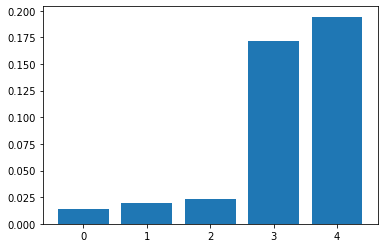

{'ssc_%': 0.01372001968761154,
 'entrance_score': 0.01969055750999588,
 'mba_%': 0.02285653286545209,
 'hsc_%': 0.17200726609879052,
 'degree_%': 0.19437098769147487}

In [57]:
#Feature Importance
imp_dict = {}
for i,j in list(zip(x_testb, rf.feature_importances_)):
    imp_dict[i] = j
imp_dict = {k:v for k,v in sorted(imp_dict.items(), key =lambda item: item[1])}

plt.bar([x for x in range(len(imp_dict.keys()))], [y for y in imp_dict.values()])
plt.show()

display(imp_dict)

### Evaluation

In [58]:
#R square
y_predict_train2 = rf2.predict(x_train2)
y_predict_test2 = rf2.predict(x_test2)

print("Training R^2 score: ", metrics.r2_score(y_train2 , y_predict_train2))
print("Testing R^2 score: ",metrics.r2_score(y_test2 , y_predict_test2))

#Accuracy
errors = abs(y_predict_train2 - np.array(y_train2['compensation']))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.array(y_train2['compensation']))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Training Accuracy:', round(accuracy, 2), '%.')


errors = abs(y_predict_test2 - np.array(y_test2['compensation']))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.array(y_test2['compensation']))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Testing Accuracy:', round(accuracy, 2), '%.')

Training R^2 score:  0.8512771606535496
Testing R^2 score:  0.025328259674767373
Training Accuracy: 93.21 %.
Testing Accuracy: 81.86 %.


#### Observation:
- Better R^2
- Minimal change in accuracy due to less features
- We thus use second iteration model to predict for our use case

# Compensation Prediction

In [76]:
df_np = df[df['status'] == "Not Placed"]
display(df_np.head())

compensation = list(rf2.predict(df_np[["entrance_score", "hsc_%", "ssc_%", "degree_%", "mba_%"]]))
df_np['compensation'] = compensation
df_np

,Index,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status,compensation
3,1004,M,56.00,Central,52.00,Central,Science,52.00,Science & Technology,No,66.00,Marketing & Human Resources,59.43,Not Placed,nan
5,1006,M,55.00,Others,49.80,Others,Science,67.25,Science & Technology,Yes,55.00,Marketing & Finance,51.58,Not Placed,nan
6,1007,F,46.00,Others,49.20,Others,Commerce,79.00,Commerce & Management,No,74.28,Marketing & Finance,53.29,Not Placed,nan
9,1010,M,58.00,Central,70.00,Central,Commerce,61.00,Commerce & Management,No,54.00,Marketing & Finance,52.21,Not Placed,nan
12,1013,F,47.00,Central,55.00,Others,Science,65.00,Commerce & Management,No,62.00,Marketing & Human Resources,65.04,Not Placed,nan


C:\Users\nmkha\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Index,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status,compensation
3,1004,M,56.00,Central,52.00,Central,Science,52.00,Science & Technology,No,66.00,Marketing & Human Resources,59.43,Not Placed,444150.00
5,1006,M,55.00,Others,49.80,Others,Science,67.25,Science & Technology,Yes,55.00,Marketing & Finance,51.58,Not Placed,444150.00
6,1007,F,46.00,Others,49.20,Others,Commerce,79.00,Commerce & Management,No,74.28,Marketing & Finance,53.29,Not Placed,444150.00
9,1010,M,58.00,Central,70.00,Central,Commerce,61.00,Commerce & Management,No,54.00,Marketing & Finance,52.21,Not Placed,444150.00
12,1013,F,47.00,Central,55.00,Others,Science,65.00,Commerce & Management,No,62.00,Marketing & Human Resources,65.04,Not Placed,444150.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1199,F,67.00,Central,70.00,Central,Commerce,65.00,Medical & Others,No,88.00,Marketing & Human Resources,71.96,Not Placed,444150.00
204,1202,M,54.20,Central,63.00,Others,Science,58.00,Commerce & Management,No,79.00,Marketing & Human Resources,58.44,Not Placed,444150.00
209,1207,M,41.00,Central,42.00,Central,Science,60.00,Commerce & Management,No,97.00,Marketing & Finance,53.39,Not Placed,444150.00
212,1209,F,43.00,Central,60.00,Others,Science,65.00,Commerce & Management,No,92.66,Marketing & Human Resources,62.92,Not Placed,444150.00


# Conclusion:

- The model generated has high Accuracy but Low R^2
- It thus explains less variability in the data
- Improvements can be made with more data available for generating model